# Tweet Analysis for Cryptocurrency



#### Importing the Required Libraries and Loading the Data from Json file

In [1]:
# Importing the important libraries 

import tweepy
from tweepy import OAuthHandler
import json
import re
from nltk.tokenize import word_tokenize
import operator
from collections import Counter
from nltk import bigrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Accesing the data. 

tweet_files = ['tweets_1.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))
print (len(tweets))

134195


In [3]:
# Creating an dataframe from tweets and extracting relevant information from tweets variable!

def populate_tweet_df(tweets):
    
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
 
    return df

In [4]:
df = populate_tweet_df(tweets)

In [5]:
# Getting the and looking at the first 5 columns 
df.head()

,text,location,country_code,long,latt,created_at
0,RT @Peurtoken: https://t.co/oXIXJbYU9R marketp...,Ukraine Alchevsk,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018
1,@xSeaofViolence How to do 10x on one month? Ea...,None,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018
2,RT @pushpendrakum: #isupportcrypto #RBICantSto...,"बेलागंज, भारत",,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018
3,#XYO #geolocation#Crypto #Blockchain #ether #...,"Bekasi, Jawa Barat",,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018
4,RT @RcoinProject: Much more than a cryptocurre...,None,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018


In [6]:
# Importing TextBlob for natural language processing and sentiment analysis

from textblob import TextBlob
import re

def clean_tweet(tweet):

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):

    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [7]:
# Getting polarith and subjectivity as well as assigning an Sentiment to each of the tweet. 

df[['polarity', 'subjectivity']] = df['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))
df['SA'] = np.array([ analize_sentiment(tweet) for tweet in df['text'] ])

In [8]:
# Checking the numbers of polarity, subjectivity and Sentiments of the first 5 tweet.

df.head()

,text,location,country_code,long,latt,created_at,polarity,subjectivity,SA
0,RT @Peurtoken: https://t.co/oXIXJbYU9R marketp...,Ukraine Alchevsk,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018,0.000000,0.000000,0
1,@xSeaofViolence How to do 10x on one month? Ea...,None,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018,0.433333,0.833333,1
2,RT @pushpendrakum: #isupportcrypto #RBICantSto...,"बेलागंज, भारत",,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018,0.000000,0.000000,0
3,#XYO #geolocation#Crypto #Blockchain #ether #...,"Bekasi, Jawa Barat",,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018,0.000000,0.000000,0
4,RT @RcoinProject: Much more than a cryptocurre...,None,,NaN,NaN,Thu Apr 12 16:42:46 +0000 2018,0.500000,0.650000,1


In [9]:
# Catagorizing the tweets based on their sentiments. 

pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] < 0]


In [10]:
# Getting the percentage of each of the  Sentiments based on polarity. 

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

Percentage of positive tweets: 40.57006594880584%
Percentage of neutral tweets: 50.046574015425314%
Percentage de negative tweets: 9.383360035768844%


In [11]:
# Creaeting function for getting an average sentiment analysis

#def percent_tweet(tweets):
#    return len(tweets)*100/len(df['text'])
    

In [12]:
# Creating the second dataframe for Time Series Analysis 

def populate_tweet_df_2(tweets):
    df_2 = pd.DataFrame()
    
    df_2['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df_2['ones'] = [1]*len(df_2)
    return df_2 

df_2 = populate_tweet_df_2(tweets)

df_2['created_at'] = pd.to_datetime(df_2['created_at'])
df_3 = df_2.set_index('created_at')


In [13]:
df_2.head()

,created_at,ones
0,2018-04-12 16:42:46,1
1,2018-04-12 16:42:46,1
2,2018-04-12 16:42:46,1
3,2018-04-12 16:42:46,1
4,2018-04-12 16:42:46,1


In [14]:
# Changing the time of the tweeets and getting an statistical analysis

df_4 = df_3.resample('1min').sum()
print(df_4.head(20))
print(df_4.describe())

                     ones
created_at               
2018-04-12 16:42:00    58
2018-04-12 16:43:00   314
2018-04-12 16:44:00   360
2018-04-12 16:45:00   357
2018-04-12 16:46:00   311
2018-04-12 16:47:00   331
2018-04-12 16:48:00   298
2018-04-12 16:49:00   284
2018-04-12 16:50:00   353
2018-04-12 16:51:00   270
2018-04-12 16:52:00   360
2018-04-12 16:53:00   314
2018-04-12 16:54:00   330
2018-04-12 16:55:00   307
2018-04-12 16:56:00   354
2018-04-12 16:57:00   320
2018-04-12 16:58:00   316
2018-04-12 16:59:00   318
2018-04-12 17:00:00   563
2018-04-12 17:01:00   422
             ones
count  493.000000
mean   272.200811
std     60.163516
min     30.000000
25%    227.000000
50%    271.000000
75%    309.000000
max    563.000000


In [15]:
# df_4.reset_index(level=['created_at'], inplace=True)

In [16]:
df_4.head()

,ones
created_at,
2018-04-12 16:42:00,58
2018-04-12 16:43:00,314
2018-04-12 16:44:00,360
2018-04-12 16:45:00,357
2018-04-12 16:46:00,311


In [17]:
df_4['created_at'] = df_4.index
df_4['created_at'] = pd.to_datetime(df_4['created_at'])
df_4.reset_index(level=['created_at'], inplace=True)
df_4.head()

,ones,created_at
0,58,2018-04-12 16:42:00
1,314,2018-04-12 16:43:00
2,360,2018-04-12 16:44:00
3,357,2018-04-12 16:45:00
4,311,2018-04-12 16:46:00


# Data Analysis Section 

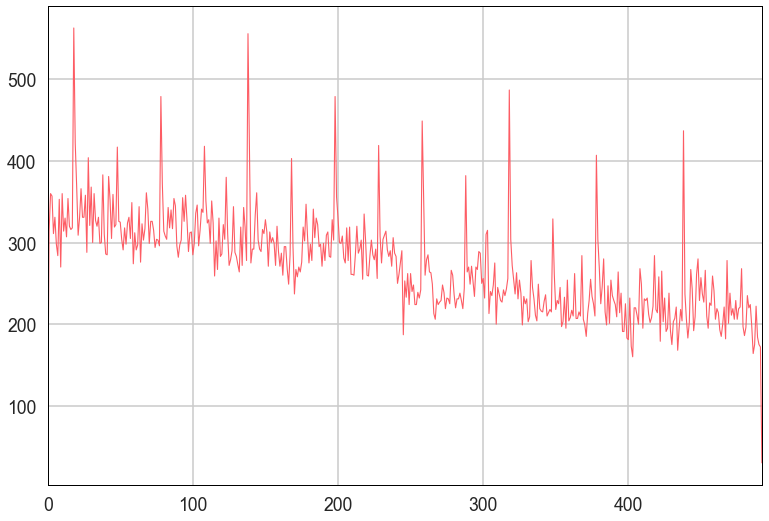

In [18]:
# Making a time series analysis on each tweets for finding the correlation between them ! 

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
df_4.ones.plot(kind='line', linewidth=1.1, color='#FD5C64')


In [19]:
# Changing the created at to pandas date time so pandas can understand it !!!

df['created_at'] = pd.to_datetime(df['created_at'])

In [20]:
# Reading the bitcoin data and changing the date as datatime object in pandas

df_btc = pd.read_csv('bitcoinprice.csv')
df_btc['created_at'] = pd.to_datetime(df_btc['Date'])


In [21]:
# Combining the two data frame using the inner join
df_combined = pd.merge(df, df_btc, on='created_at', how='inner')

In [22]:
# Getting the top 5 from data frame.

df_combined.head()

,text,location,country_code,long,latt,created_at,polarity,subjectivity,SA,Date,Close Price
0,RT @ProducToken: Now our website is available ...,None,,NaN,NaN,2018-04-12 16:43:00,0.500000,0.400000,1,4/12/18 16:43,7605.44
1,RT @bitbns: Jobs in cryptocurrencies can give ...,None,,NaN,NaN,2018-04-12 16:43:00,0.500000,0.500000,1,4/12/18 16:43,7605.44
2,RT @bethereumteam: Looking to #contribute in a...,"Тверь, Россия",,NaN,NaN,2018-04-12 16:43:00,0.111905,0.567857,1,4/12/18 16:43,7605.44
3,GO Bitcoin &amp; all Cryptos https://t.co/XKR...,United States,,NaN,NaN,2018-04-12 16:43:00,0.000000,0.000000,0,4/12/18 16:43,7605.44
4,RT @TradePlayz: Another day at the office. Tra...,None,,NaN,NaN,2018-04-12 16:44:00,0.000000,0.000000,0,4/12/18 16:44,7609.76


In [23]:
# Setting the index as created at 

df_combined = df_combined.set_index('created_at')


In [24]:
# Checking the dataframe

df_combined.head()

,text,location,country_code,long,latt,polarity,subjectivity,SA,Date,Close Price
created_at,,,,,,,,,,
2018-04-12 16:43:00,RT @ProducToken: Now our website is available ...,None,,NaN,NaN,0.500000,0.400000,1,4/12/18 16:43,7605.44
2018-04-12 16:43:00,RT @bitbns: Jobs in cryptocurrencies can give ...,None,,NaN,NaN,0.500000,0.500000,1,4/12/18 16:43,7605.44
2018-04-12 16:43:00,RT @bethereumteam: Looking to #contribute in a...,"Тверь, Россия",,NaN,NaN,0.111905,0.567857,1,4/12/18 16:43,7605.44
2018-04-12 16:43:00,GO Bitcoin &amp; all Cryptos https://t.co/XKR...,United States,,NaN,NaN,0.000000,0.000000,0,4/12/18 16:43,7605.44
2018-04-12 16:44:00,RT @TradePlayz: Another day at the office. Tra...,None,,NaN,NaN,0.000000,0.000000,0,4/12/18 16:44,7609.76


In [25]:
# Getting the average polarity, sensitivity, close price for every hour it can be change to what ever input minutes we can put! 

df_combined = df_combined[['polarity', 'subjectivity', 'Close Price']].resample('1Min').mean()

In [26]:
# Checking the head of the dataframe 

df_combined.head()

,polarity,subjectivity,Close Price
created_at,,,
2018-04-12 16:43:00,0.277976,0.366964,7605.44
2018-04-12 16:44:00,0.175000,0.238889,7609.76
2018-04-12 16:45:00,0.125641,0.371538,7610.29
2018-04-12 16:46:00,0.267857,0.457143,7609.78
2018-04-12 16:47:00,0.231250,0.317857,7609.24


In [27]:
df_combined['created_at'] = df_combined.index
df_combined = pd.merge(df_combined, df_4, on = 'created_at', how ='inner')

In [28]:
print(df_combined.tail())
print(df_combined.describe())

     polarity  subjectivity  Close Price          created_at  ones
487  0.091667      0.150000      7864.95 2018-04-13 00:50:00   222
488  0.034091      0.113636      7878.90 2018-04-13 00:51:00   184
489  0.333333      0.373810      7883.54 2018-04-13 00:52:00   175
490  0.201667      0.431667      7894.23 2018-04-13 00:53:00   172
491  0.136364      0.454545      7902.91 2018-04-13 00:54:00    30
         polarity  subjectivity  Close Price        ones
count  487.000000    487.000000   487.000000  492.000000
mean     0.107232      0.273460  7765.055359  272.636179
std      0.132418      0.156638    95.609554   59.442280
min     -0.500000      0.000000  7583.260000   30.000000
25%      0.019185      0.168155  7691.020000  227.750000
50%      0.091582      0.258852  7720.160000  271.000000
75%      0.178733      0.360357  7850.480000  309.000000
max      0.700000      0.833333  7981.900000  563.000000


In [29]:
# Setting index back to created_at

df_combined = df_combined.set_index('created_at')

In [30]:
# Getting the shape of the dataframe 

print(f'We have {df_combined.shape[0]} rows and {df_combined.shape[1]} columns in the data set after reshaping to every minute.')

We have 492 rows and 4 columns in the data set after reshaping to every minute.


In [31]:
# Getting the statistics from the dataframe ! 

df_combined.describe()

,polarity,subjectivity,Close Price,ones
count,487.000000,487.000000,487.000000,492.000000
mean,0.107232,0.273460,7765.055359,272.636179
std,0.132418,0.156638,95.609554,59.442280
min,-0.500000,0.000000,7583.260000,30.000000
25%,0.019185,0.168155,7691.020000,227.750000
50%,0.091582,0.258852,7720.160000,271.000000
75%,0.178733,0.360357,7850.480000,309.000000
max,0.700000,0.833333,7981.900000,563.000000


In [32]:
df_combined = df_combined.dropna()

In [33]:
# PUtting data into csv so I can make the visualizations in Tableau

#df_combined.to_csv('combined_data.csv', sep='\t')

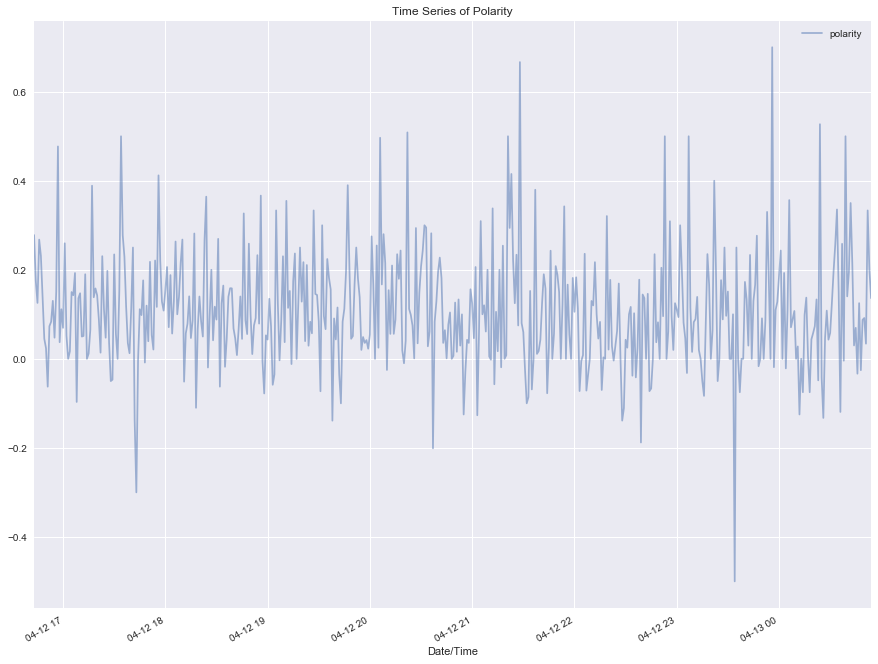

In [80]:
# Getting time series of the polarity
sns.set(rc={"figure.figsize": (15, 12)})
ax = df_combined[['polarity']].plot(alpha = 0.5, style ='-')
ax.set_title("Time Series of Polarity")
ax.set_xlabel('Date/Time')

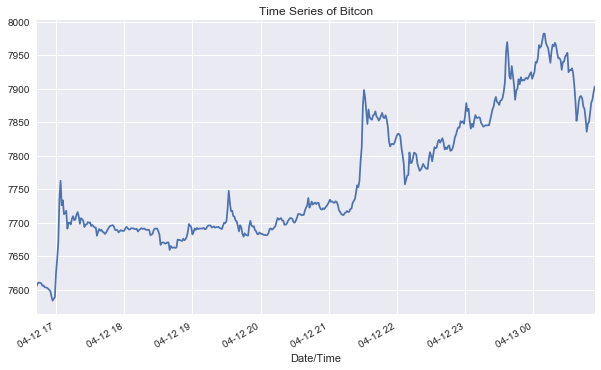

In [75]:
# Time Series for Bitcoin
sns.set(rc={"figure.figsize": (10, 6)})
ax = df_combined['Close Price'].plot()
ax.set_title("Time Series of Bitcon")
ax.set_xlabel('Date/Time')

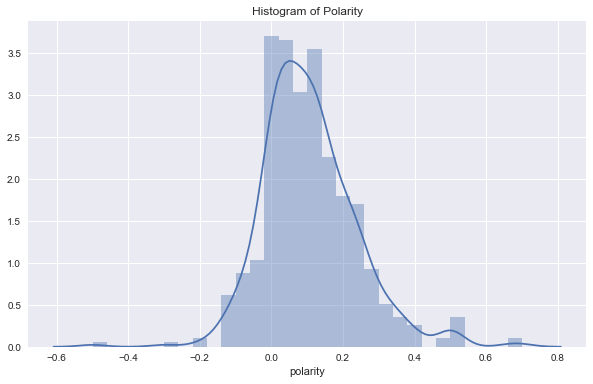

In [72]:
# Histgorams of the data polarity
sns.set(rc={"figure.figsize": (10, 6)})
ax = sns.distplot(df_combined['polarity'])
ax.set_title("Histogram of Polarity")

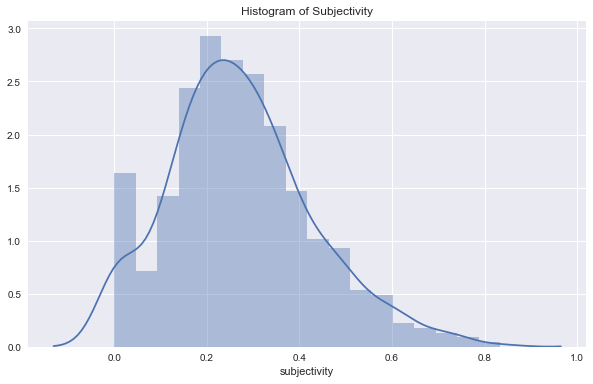

In [77]:
# Histgorams of the data subjectivity
sns.set(rc={"figure.figsize": (10, 6)})
ax = sns.distplot(df_combined['subjectivity'])
ax.set_title("Histogram of Subjectivity")

              polarity  subjectivity  Close Price      ones
polarity      1.000000      0.369400    -0.086706  0.021240
subjectivity  0.369400      1.000000    -0.027066 -0.032462
Close Price  -0.086706     -0.027066     1.000000 -0.637943
ones          0.021240     -0.032462    -0.637943  1.000000


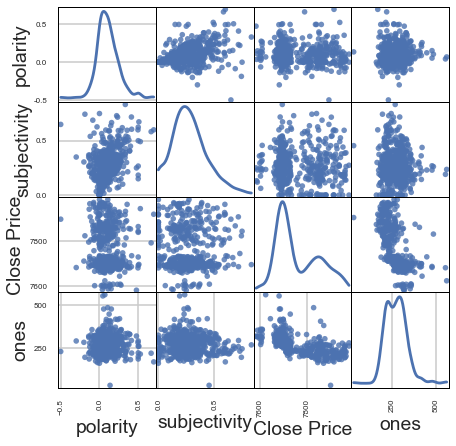

In [84]:
# Scatter Plot Matrix 


from pandas.plotting import scatter_matrix
scatter_matrix(df_combined, alpha = 0.8, figsize=(7, 7), diagonal='kde')
print(df_combined.corr())

# Model Creation 

In [34]:
# Importing the required sklearn package for splitting the data!

from sklearn.model_selection import train_test_split

# Features 
x = df_combined[['polarity', 'subjectivity', 'ones']]

# Target 

y = df_combined['Close Price']

In [35]:
# Splitting the data into train test 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

### AdaBoostRegressor 

In [38]:
# Importing the required model

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [39]:
# Fitting the train data into regressor

ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [42]:
y_predict = ada.predict(X_test)

[ 7678.94        7867.70726027  7874.54833333  7693.89932203  7819.24037736
  7843.73240741  7693.89932203  7734.67028571  7693.89932203  7748.49985507
  7707.284       7693.89932203  7849.81957447  7705.08880952  7819.24037736
  7723.35516129  7828.33267606  7697.8672449   7697.8672449   7723.35516129
  7830.29528571  7701.2562069   7693.89932203  7828.33267606  7767.13737705
  7686.63466019  7852.50076923  7673.45085714  7698.09066667  7840.45494318
  7701.2562069   7852.50076923  7723.35516129  7708.80655172  7828.33267606
  7693.89932203  7678.94        7843.73240741  7686.63466019  7693.89932203
  7844.84900498  7839.13104     7839.13104     7843.73240741  7849.81957447
  7701.2562069   7825.54215385  7830.29528571  7825.54215385  7678.94
  7731.61826087  7693.89932203  7678.94        7723.35516129  7724.45708333
  7697.8672449   7693.89932203  7710.04428571  7739.13032787  7849.81957447
  7693.89932203  7693.89932203  7822.70418182  7725.66263158  7795.21374101
  7766.98558824  7

In [43]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.4720997798144313

### Decison Trees

In [76]:
# Importing the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

# Importing the cross val score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree, X_train, y_train, cv = 10)

In [77]:
print(np.mean(cv_scores))

-0.108774542498


### Linear Regression 


In [73]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

cv_scores_2 = cross_val_score(linear, X_train, y_train, scoring = 'r2', cv = 10)

In [74]:
print(np.mean(cv_scores_2))

0.392694118154


### Data Visualizations of The Scores

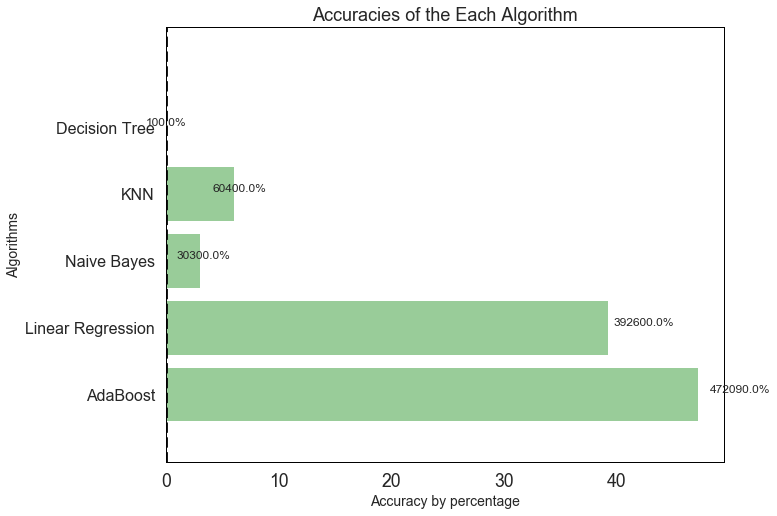

In [78]:
data = [47.209, 39.26, 3.03, 6.04, 0.01]

bar_labels = ['AdaBoost', 'Linear Regression', 'Naive Bayes', 'KNN', 'Decision Tree']

fig = plt.figure(figsize=(10,8))

# plot bars
y_pos = np.arange(len(data))
plt.yticks(y_pos, bar_labels, fontsize=16)
bars = plt.barh(y_pos, data,
         align='center', alpha=0.4, color='g')

# annotation and labels

for b,d in zip(bars, data):
    plt.text(b.get_width() + b.get_width()*0.08, b.get_y() + b.get_height()/2,
        '{:.1%}'.format(d/min(data)), 
        ha='center', va='bottom', fontsize=12)

plt.xlabel('Accuracy by percentage', fontsize=14)
plt.ylabel('Algorithms', fontsize=14)
t = plt.title('Accuracies of the Each Algorithm', fontsize=18)
plt.ylim([-1,len(data)+0.5])
plt.vlines(min(data), -1, len(data)+0.5, linestyles='dashed')
plt.grid()

plt.show()

In [63]:
df_combined.head()

,polarity,subjectivity,Close Price,ones
created_at,,,,
2018-04-12 16:43:00,0.277976,0.366964,7605.44,314
2018-04-12 16:44:00,0.175000,0.238889,7609.76,360
2018-04-12 16:45:00,0.125641,0.371538,7610.29,357
2018-04-12 16:46:00,0.267857,0.457143,7609.78,311
2018-04-12 16:47:00,0.231250,0.317857,7609.24,331


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

np.random.seed(3057) 

In [26]:
pscore = df_combined['polarity']
pscore = pscore.values
pscore[:5]

array([ 0.5       ,  0.5       ,  0.11190476,  0.        ,  0.        ])

In [27]:
len(pscore)

2729

In [28]:
btc_price = df_combined['Close Price']
btc_price = btc_price.values
btc_price[:5]

array([ 7605.44,  7605.44,  7605.44,  7605.44,  7609.76])

In [29]:
len(btc_price)

2729

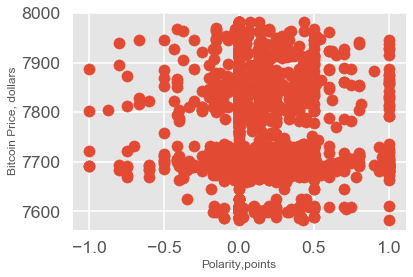

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel("Polarity,points")
ax.set_ylabel("Bitcoin Price, dollars")
ax.scatter(pscore, btc_price)
fig

In [31]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [32]:
pscore = pscore.reshape(-1, 1)
btc_price = btc_price.reshape(-1, 1)
print(pscore[:5])
print(btc_price[:5])

[[ 0.5       ]
 [ 0.5       ]
 [ 0.11190476]
 [ 0.        ]
 [ 0.        ]]
[[ 7605.44]
 [ 7605.44]
 [ 7605.44]
 [ 7605.44]
 [ 7609.76]]


In [33]:
lr.fit(pscore, btc_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(lr.intercept_)

[ 7753.91390768]


In [35]:
print(lr.coef_)

[[-14.62400693]]


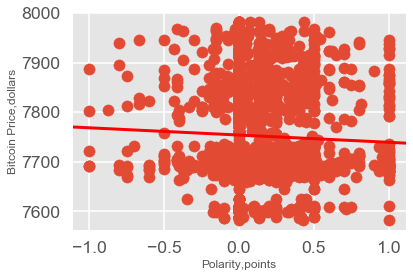

In [36]:
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Polarity,points")
ax.set_ylabel("Bitcoin Price,dollars")
ax.scatter(pscore, btc_price)
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

In [37]:
estimated_price = lr.predict(0.8)
print(estimated_price)

[[ 7742.21470214]]


In [40]:
#Support Vector Machines

df_combined_2.head()


,created_at,polarity
0,2018-04-12 16:43:00,0.500000
1,2018-04-12 16:43:00,0.500000
2,2018-04-12 16:43:00,0.111905
3,2018-04-12 16:43:00,0.000000
4,2018-04-12 16:44:00,0.000000


In [42]:
df_combined.head()

,text,location,country_code,long,latt,created_at,polarity,subjectivity,SA,Date,Close Price
0,RT @ProducToken: Now our website is available ...,None,,NaN,NaN,2018-04-12 16:43:00,0.500000,0.400000,1,4/12/18 16:43,7605.44
1,RT @bitbns: Jobs in cryptocurrencies can give ...,None,,NaN,NaN,2018-04-12 16:43:00,0.500000,0.500000,1,4/12/18 16:43,7605.44
2,RT @bethereumteam: Looking to #contribute in a...,"Тверь, Россия",,NaN,NaN,2018-04-12 16:43:00,0.111905,0.567857,1,4/12/18 16:43,7605.44
3,GO Bitcoin &amp; all Cryptos https://t.co/XKR...,United States,,NaN,NaN,2018-04-12 16:43:00,0.000000,0.000000,0,4/12/18 16:43,7605.44
4,RT @TradePlayz: Another day at the office. Tra...,None,,NaN,NaN,2018-04-12 16:44:00,0.000000,0.000000,0,4/12/18 16:44,7609.76


In [62]:
df_btc_price = df_combined[['created_at', 'polarity', 'Close Price']]
# Setting the index as created at 

df_btc_price  = df_btc_price.set_index('created_at')


In [81]:
# Getting the average polarity for every hour it can be change to what ever input minutes we can put! 

df_polarity = df_btc_price.resample('5Min').mean()
df_polarity
#df_btc_price.resample('5S', how='mean')

,polarity,Close Price
created_at,,
2018-04-12 16:40:00,0.216190,7608.032000
2018-04-12 16:45:00,0.169596,7608.671951
2018-04-12 16:50:00,0.064718,7601.718182
2018-04-12 16:55:00,0.115083,7589.995714
2018-04-12 17:00:00,0.076453,7679.049512
2018-04-12 17:05:00,0.139903,7721.131290
2018-04-12 17:10:00,0.093053,7697.957742
2018-04-12 17:15:00,0.134402,7710.217097
2018-04-12 17:20:00,0.125639,7704.510588


In [63]:
df_btc_price.head()

,polarity,Close Price
created_at,,
2018-04-12 16:43:00,0.500000,7605.44
2018-04-12 16:43:00,0.500000,7605.44
2018-04-12 16:43:00,0.111905,7605.44
2018-04-12 16:43:00,0.000000,7605.44
2018-04-12 16:44:00,0.000000,7609.76


In [46]:
df_btc_price.shape

(2729, 3)

In [197]:
X = df_polarity['polarity'].values.astype(float)

In [110]:
X.shape

(99,)

In [189]:
y = df_polarity['Close Price'].values.astype(int)

In [190]:
y.shape

(99,)

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
plt.plot(X)

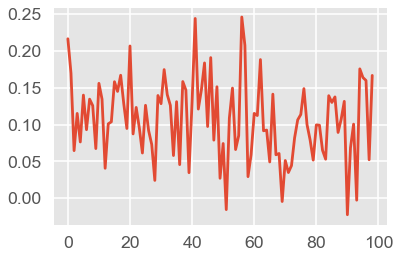

In [89]:
plt.show()

In [191]:
plt.plot(X,y)

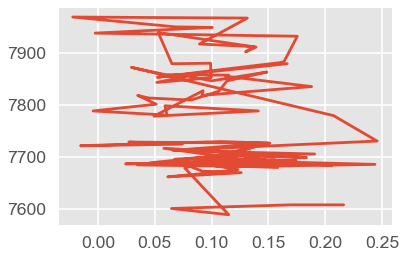

In [192]:
plt.show()

In [200]:
X = X.reshape((X.shape[0], 1))
X.shape

(99, 1)

In [201]:
y.shape

(99,)

In [213]:
k_values = np.arange(1, 66, 2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65]


In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=9876)

In [215]:
accuracies = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true = y_test
    accuracy = accuracy_score(y_true, y_pred)
    accuracies.append(accuracy)

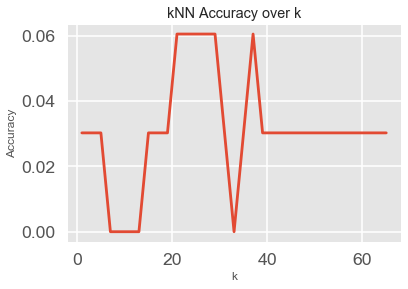

In [216]:
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy over k")
plt.show()

In [218]:
k_accuracies = list(zip(k_values, accuracies))
k_accuracies

[(1, 0.030303030303030304),
 (3, 0.030303030303030304),
 (5, 0.030303030303030304),
 (7, 0.0),
 (9, 0.0),
 (11, 0.0),
 (13, 0.0),
 (15, 0.030303030303030304),
 (17, 0.030303030303030304),
 (19, 0.030303030303030304),
 (21, 0.060606060606060608),
 (23, 0.060606060606060608),
 (25, 0.060606060606060608),
 (27, 0.060606060606060608),
 (29, 0.060606060606060608),
 (31, 0.030303030303030304),
 (33, 0.0),
 (35, 0.030303030303030304),
 (37, 0.060606060606060608),
 (39, 0.030303030303030304),
 (41, 0.030303030303030304),
 (43, 0.030303030303030304),
 (45, 0.030303030303030304),
 (47, 0.030303030303030304),
 (49, 0.030303030303030304),
 (51, 0.030303030303030304),
 (53, 0.030303030303030304),
 (55, 0.030303030303030304),
 (57, 0.030303030303030304),
 (59, 0.030303030303030304),
 (61, 0.030303030303030304),
 (63, 0.030303030303030304),
 (65, 0.030303030303030304)]

In [ ]:
KNeighborsClassifier gives very less accuracy in our case as seen above

In [226]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [227]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 3.0303030303


In [ ]:
df_